### PSO (Particla Swarm Optimization) Algorithm

##### Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Fitness Functions

- Sphere Function

In [2]:
def sphere( x):
	return np.sum( [ i ** 2 for i in x])

- Rastrigin Function

In [3]:
def rastr( x):
	return 10 * len( x) + np.sum( [ i ** 2 - 10 * np.cos( 2 * np.pi * i) for i in x])

##### PSO Function

In [4]:
# w: inertia weight
# c1: cognitive coefficient
# c2: global coefficient
# d: number of dimensions
# pn: number of particles
# domain: range of search space in every dimension
# n_iter: number of iterations
# tol: minimum value considered for value of fitness function
# fit: fitness function
def pso( w, c1, c2, d, pn, domain, n_iter, tol, fit):
	
	# position of particles. initial seed within [ -domain, domain]
	p = ( 2 * domain * np.random.rand( pn, d)) - domain
	
	# initial velocity
	v = np.zeros( ( pn, d))

	# best position of particle initiated with p ( initial location)
	pbest = np.copy( p)

	# value of fit function for each particle
	f = np.array( [ fit( i) for i in p])

	# best value of fit function for each particle
	# initiated with f ( initial value of fit function for each particle)
	fpbest = np.copy( f)

	# best value of fit function among all particles
	# and its corresponding location
	fgbest, gbest = f.min(), p[ f.argmin()]

	# variable for recording history of fgbest (best value of fit function)
	history = []

	# iterate n_iter time
	for i in range( n_iter):
		
		# recording best value of fit function
		history.append( fgbest)

		# stop the algorithm if optimum point is reached
		if fgbest <= tol:
			break

		# generate two matrices of random numbers in range [ -1, 1] and shape of ( pn, d) ( for each particle and for each dimension)
		r1 = np.random.rand( pn, d)
		r2 = np.random.rand( pn, d)

		# calculate velocity of particles in each dimenstion
		v = ( w * v) + ( r1 * c1 * ( pbest - p)) + ( r2 * c2 * ( gbest - p))

		# update position of particle
		p = p + v

		# calculate value of fit function for new position of each particle
		f = np.apply_along_axis( fit, 1, p)

		# find indices of particles with better value of fit function than their previous value
		indices = np.nonzero( f < fpbest)

		# update value of fit function for particles that found a better value
		fpbest[ indices] = f[ indices]

		# update position of particles that found a better value
		pbest[ indices] = p[ indices]
		
		# if there is better value than best value
		# if f.min() < fgbest:
			# update best value and its corresponding location
		fgbest, gbest = f.min(), p[ f.argmin()]
		
	return history, fgbest, gbest

##### Driver

Best Value: 0.0
Best Params:
[1.54450802e-09 9.77857224e-12]


C:\Users\karimi\AppData\Local\Temp\ipykernel_8096\1637589255.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.plot( np.log10( h))


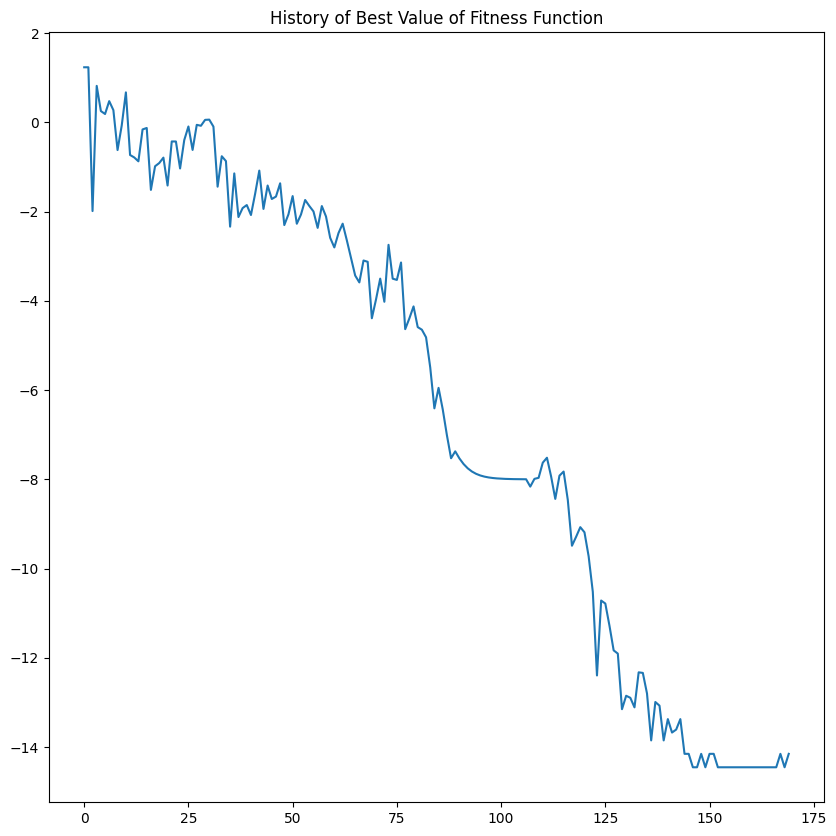

In [5]:
h, f, p = pso(
	w=0.7,
	c1=1.5,
	c2=1.5,
	d=2,
	pn=4,
	domain=1,
	n_iter=1000,
	tol=0,
	fit=rastr
)

print( f"Best Value: { f}")
print( f"Best Params:\n{ p}")

plt.figure( figsize=( 10, 10))
plt.title( "History of Best Value of Fitness Function")
plt.plot( np.log10( h))
plt.show()